<a href="https://colab.research.google.com/github/Khushibung05/regularisation/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x=np.array([1,2,3,4,5,6]).reshape(-1,1)#studyhours
y=np.array([35,40,55,60,65,70])#marks

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)


In [12]:
print("GOOD FIT (Linear Regression)")
print("train mse:",mean_squared_error(y_train,y_train_pred))
print("test mse:",mean_squared_error(y_test,y_test_pred))
print("Train r2:",r2_score(y_train,y_train_pred))
print("Test r2:",r2_score(y_test,y_test_pred))

GOOD FIT (Linear Regression)
train mse: 0.0
test mse: 100.0
Train r2: 1.0
Test r2: -15.0


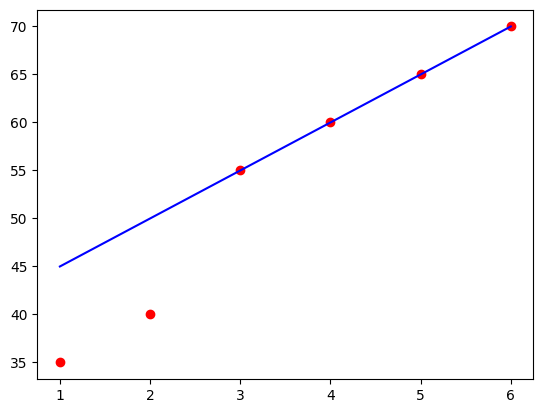

In [13]:
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg.predict(x),color="blue")
plt.show()

In [14]:

poly=PolynomialFeatures(degree=5)

x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

overfit_model=LinearRegression()
overfit_model.fit(x_train_poly,y_train)

y_train_pred=overfit_model.predict(x_train_poly)
y_test_pred=overfit_model.predict(x_test_poly)

In [16]:
##metrics
print("OVERFITTING (Polynomial Regression)")
print("train mse:",mean_squared_error(y_train,y_train_pred))
print("test mse:",mean_squared_error(y_test,y_test_pred))
print("Train r2:",r2_score(y_train,y_train_pred))
print("Test r2:",r2_score(y_test,y_test_pred))

OVERFITTING (Polynomial Regression)
train mse: 2.490440188669976e-24
test mse: 149.48093567801132
Train r2: 1.0
Test r2: -22.916949708481813


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

###Ridge

In [21]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(x_poly,y)
y_ridge_pred=ridge.predict(x_poly)

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
print("Ridge Regression")
print("mse:",mean_squared_error(y,y_ridge_pred))
print("r2:",r2_score(y,y_ridge_pred))


Ridge Regression
mse: 1.8673498920856764
r2: 0.9884592968042774


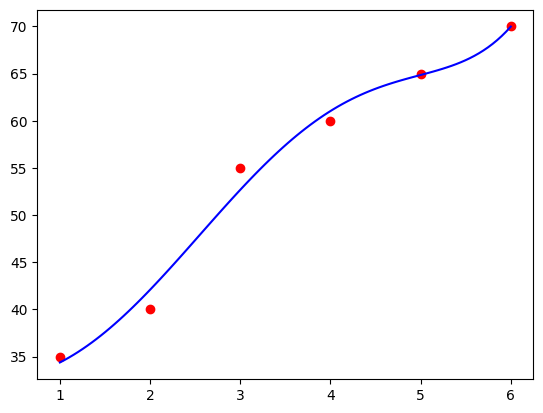

In [23]:
import matplotlib.pyplot as plt
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_poly_grid=poly.transform(x_grid)
plt.scatter(x,y,color="red")
plt.plot(x_grid,ridge.predict(x_poly_grid),color="blue")
plt.show()

###LASSO

In [24]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_poly,y)
y_lasso_pred=lasso.predict(x_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+01, tolerance: 9.708e-02
  model = cd_fast.enet_coordinate_descent(


In [25]:
from sklearn.metrics import mean_squared_error,r2_score
print("Ridge Regression")
print("mse:",mean_squared_error(y,y_lasso_pred))
print("r2:",r2_score(y,y_lasso_pred))


Ridge Regression
mse: 3.2286565110401617
r2: 0.980046071348078


###we can see lasso mse is higher than that of ridge (high mse low accuracy)
so prefer ridge

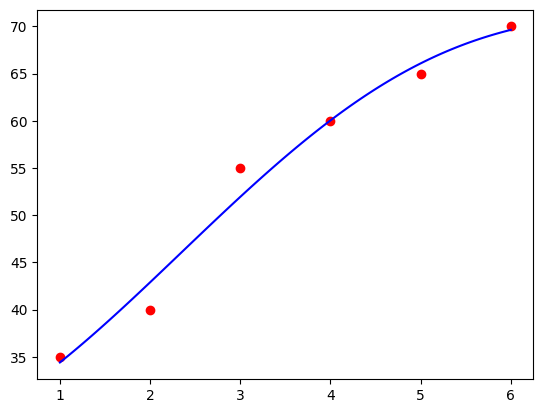

In [26]:
import matplotlib.pyplot as plt
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_poly_grid=poly.transform(x_grid)
plt.scatter(x,y,color="red")
plt.plot(x_grid,lasso.predict(x_poly_grid),color="blue")
plt.show()